In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [3]:
print(f'Training sample:\n{train_data[0]}\n')
print(f"Traning label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# shape

train_data[0].shape,train_labels[0].shape

((28, 28), ())

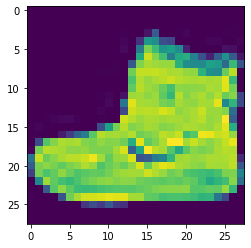

In [5]:
# plot
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

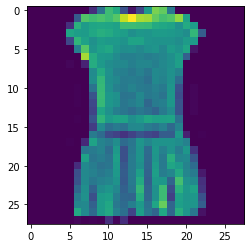

In [6]:
plt.imshow(train_data[3]);

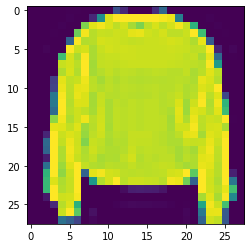

In [7]:
plt.imshow(train_data[7]);

In [8]:
# samples label
train_labels[7]

2

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

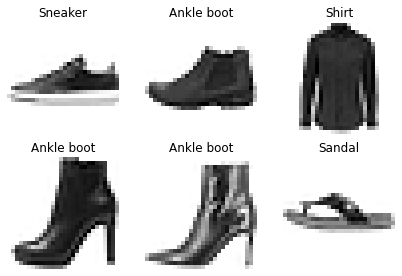

In [10]:
# Plot multiple images of fashion Mnist
import random

plt.figure(figsize=(7,7))
for i in range(6):
  ax=plt.subplot(3,3,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [11]:
train_data[0].shape,len(class_names)

((28, 28), 10)

In [12]:
 # Multi class classification Model

 tf.random.set_seed(42)

 model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')
 ])

 model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='Adam',
               metrics=['accuracy'])

history=model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy:

In [13]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
   train_data.min(),train_data.max()

(0, 255)

In [15]:
  train_data_1=train_data / 255.0
  test_data_1=test_data/255.0

  train_data_1.min(),train_data_1.max()


(0.0, 1.0)

In [16]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')
                             ])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])

history_1=model_1.fit(train_data_1,train_labels,epochs=10,validation_data=(test_data_1,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

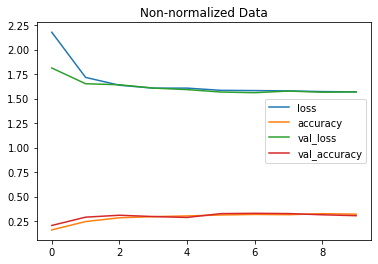

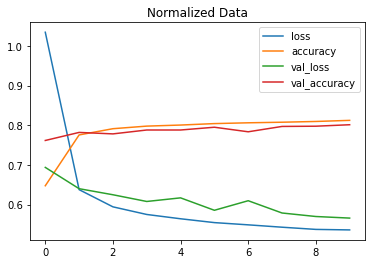

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(title='Non-normalized Data')
pd.DataFrame(history_1.history).plot(title='Normalized Data');

Finding the ideal learning rate

In [18]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

history_2=model_2.fit(train_data_1,train_labels,epochs=40,validation_data=(test_data_1,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

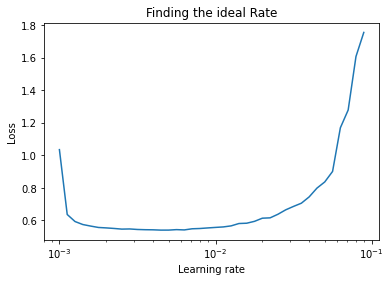

In [19]:
# PLot the curve 

import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,history_2.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("Loss")
plt.title("Finding the ideal Rate");

In [20]:
# In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

In [21]:
# Let's refit a model using the ideal learning rate.


tf.random.set_seed(42)

model_3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')
                             ])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

history_3=model_3.fit(train_data_1,train_labels,epochs=20,validation_data=(test_data_1,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [23]:
# Create a confusion Matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10) 
                          """
  cm = confusion_matrix(y_true, y_pred)
   
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
# Make predictions with our model

y_probs=model_3.predict(test_data_1)

#view  5 predictions
y_probs[:5]

array([[8.56305374e-11, 3.53622649e-13, 2.66338247e-05, 4.63565968e-08,
        5.09496022e-05, 9.61195901e-02, 8.17779551e-08, 9.18693542e-02,
        4.06053849e-03, 8.07872713e-01],
       [3.42787143e-06, 1.28995587e-16, 9.59891379e-01, 2.05162735e-07,
        1.53292520e-02, 2.45320095e-13, 2.41429582e-02, 1.13834473e-28,
        6.32718555e-04, 4.47891253e-08],
       [6.10625430e-05, 9.96576846e-01, 4.38669829e-08, 3.34057584e-03,
        1.32495752e-05, 1.43834915e-21, 8.27904660e-06, 7.32397047e-18,
        5.48114016e-08, 4.92255264e-14],
       [7.50320760e-05, 9.90536869e-01, 4.25295440e-07, 9.22322087e-03,
        1.36234143e-04, 1.82770664e-18, 2.68087279e-05, 4.81261149e-14,
        1.45217291e-06, 2.22119666e-11],
       [7.21898302e-02, 1.54957138e-06, 2.55669415e-01, 1.03630936e-02,
        4.35413457e-02, 1.10696134e-13, 6.16929829e-01, 6.75448897e-23,
        1.30492181e-03, 1.21403532e-09]], dtype=float32)

In [27]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([8.5630537e-11, 3.5362265e-13, 2.6633825e-05, 4.6356597e-08,
        5.0949602e-05, 9.6119590e-02, 8.1777955e-08, 9.1869354e-02,
        4.0605385e-03, 8.0787271e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [28]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [29]:
# Convert all of the predictions probabilities into integers 

y_preds=y_probs.argmax(axis=1)

# 10 predictions labels

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [30]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [32]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

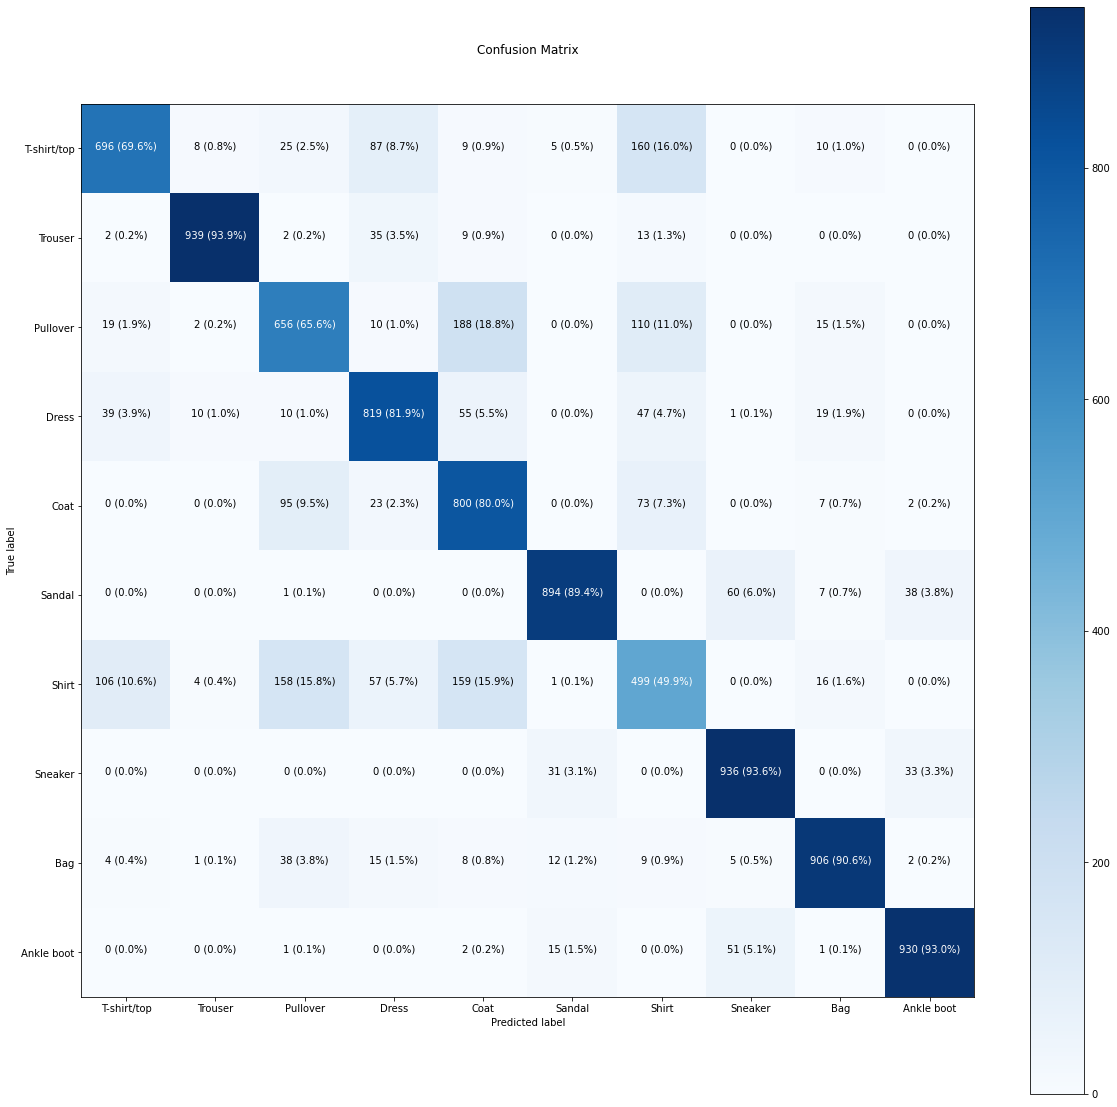

In [33]:
 # Make a confusion matrix

 make_confusion_matrix(y_true=test_labels,
                       y_pred=y_preds,
                       classes=class_names,
                       figsize=(20,20),
                       text_size=10)

In [34]:
import random
def plot_random_image(model,images,true_labels,classes):
  """ picks a random image ,plots it labels it with a prediction and truth label
  """
  i=random.randint(0,len(images))

  #prediction and targets

  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))

  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]


  plt.imshow(target_image,cmap=plt.cm.binary)

  
  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) 

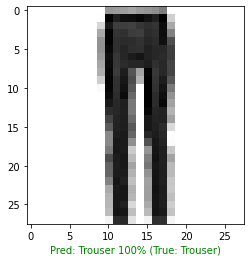

In [41]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3, 
                  images=test_data_1, 
                  true_labels=test_labels, 
                  classes=class_names)

In [42]:
# Patterns in our model

model_3.layers

In [43]:
model_3.layers[1]


In [44]:
weights,biases=model_3.layers[1].get_weights()

#shape
weights,weights.shape

(array([[ 0.7150268 , -0.06077147, -0.997631  , -1.0484309 ],
        [ 0.27732113, -0.47155517, -0.52916455,  0.02329266],
        [ 0.775243  ,  0.54027444, -1.1288565 , -0.7426149 ],
        ...,
        [-0.39453346,  0.47628713, -0.2264153 ,  0.25505945],
        [-0.40515667,  0.6181003 ,  0.23928398, -0.50387555],
        [ 0.23884527,  0.11606889, -0.12131356,  0.04352451]],
       dtype=float32), (784, 4))

In [45]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


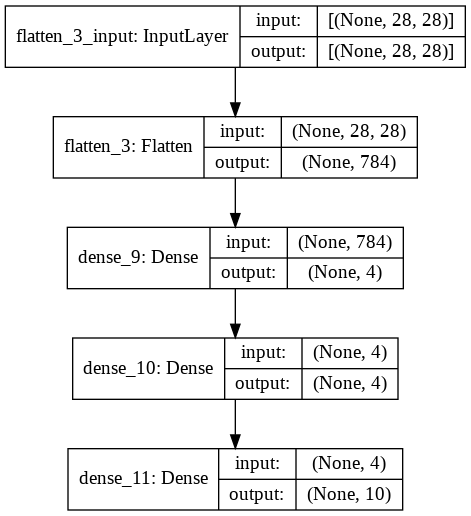

In [46]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_3, show_shapes=True)